In [2]:
import numpy as  np

in this part, we get the input from txt files

In [3]:
# infile = open('scp41.txt', 'r')
# infile = open('scp52.txt', 'r')
infile = open('scp62.txt', 'r')

In [4]:
data = list(map(int,infile.read().split()))

In [5]:
n = data[0]
m = data[1]

cost = np.zeros(m)
for i in range(m):
    cost[i] = data[2+i]
    
sc_matrix = np.zeros((n, m), dtype=int)  
j = 2+m
for i in range(n):
    for k in range(data[j]):
        sc_matrix[i][data[j+k+1]-1] = 1
    j += data[j]+1

In [6]:
from numba import njit

this is the heuristic function which is based on the brought of choosing a subset has and its cost

In [7]:
@njit
def heu(s):
    h = np.zeros(m)
    num = 0
    for i in range(n):
        is_in = sc_matrix[i]*s
        if (np.any(is_in)):
            num += 1
    for i in range(m):
        if (s[i] == 0):
            s[i] = 1
            new_num = 0
            for j in range(n):
                is_in = sc_matrix[j]*s
                if (np.any(is_in)):
                    new_num += 1
            h[i] = (new_num - num) / cost[i]
            s[i]=0
    return h

here we have the cost function which is sum of chosen subsets

In [8]:
# @njit
def cost_function(s):
    c = 0
    for i in range(m):
        c += cost[i]*s[i]
    return c

this function returns the probability of choosing a subset which is based on pheromon and heuristic

In [9]:
# @njit
def column_choice(s, phero, j, alpha, beta, H):
    if (s[j]==1):
        return 0
    return (phero[j]**alpha)*(H[j]**beta)/(sum((phero**alpha)*(H**beta)))

in this two functions, pheromons gets update:
>this update happens when an ant find subsets such that their union is U

In [10]:
# @njit
def pher_update(phero, s):
    for i in range(m):
        if (s[i]==1):
            phero[i] += 10/(cost_function(s)*6)

>in this function, some of the pheromons get disappear

In [11]:
# @njit
def pher_gen_update(phero):
    return phero*0.7

in this function we check if an ant has found subsets which their union is equal to U

In [12]:
@njit
def true_condition(s):
    for i in range(n):
        is_in = sc_matrix[i]*s
        c = np.any(is_in)
        if (not c):
            return False
    return True

this is the main algorithm:
>part A:
in this part, we run the ant colony algorithm for gen_num times

>part B:
we do the same thing till all the ants have found the requierments

>part C:
in this part we calculate the probability of choosing a subsets for all of them

>part D:
then we choose a subsets by the random number from random place

>part E:
we check for a phermon update if an ant has found ideal subsets

>part F:
at the end of generation, some of the phermons get disappeared

>part G:
then we find the best ant in each generation

In [13]:
def algorithm(a, b, ant_num, gen_num):
    alpha = a
    beta = b
    
    phero = np.zeros(m)
    for i in range(m):
        phero[i] = 0.2
        
    S = np.zeros((ant_num, m), dtype = int)
    
    best_gen = []
    best = [1 for i in range(m)]
    for i in range(gen_num): #part A
        S = np.zeros((ant_num, m), dtype = int)
        done = np.zeros((ant_num), dtype = int)
        
        while(done.sum() != ant_num): #part B
            for j in range(ant_num): 
                if (done[j] == 1):
                    continue
                else:
                    p_columns = np.zeros(m)
                    H = heu(S[j])
            
                    for k in range(m): #part C
                        p_columns[k] = column_choice(S[j], phero, k, alpha, beta, H)

                    rnd_num = np.random.rand(1)
                    b = np.random.randint(m)
                    su = 0.0
                    s = -1
 
                    while(su < rnd_num): #part D
                        s += 1
                        if (s >= m):
                            s -= 1
                            break
                        su += p_columns[(s+b)%m]
                    S[j][(s+b)%m] = 1
    
                    if (true_condition(S[j])): #part E
                        pher_update(phero, S[j])
                        done[j] = 1
        phero = pher_gen_update(phero) #part F

        minimum = np.inf
        till_best = []
        for f in range(ant_num): #part G
            cost = cost_function(S[f])
            if (cost < minimum):
                minimum = cost
                till_best = S[f]
        best_gen.append(minimum)
        if (cost_function(till_best) < cost_function(best)):
            best = till_best
    return best_gen, best

In [14]:
import matplotlib.pyplot as plt

In [273]:
arr, best = algorithm(1, 5, 5, 3) #data = scp41

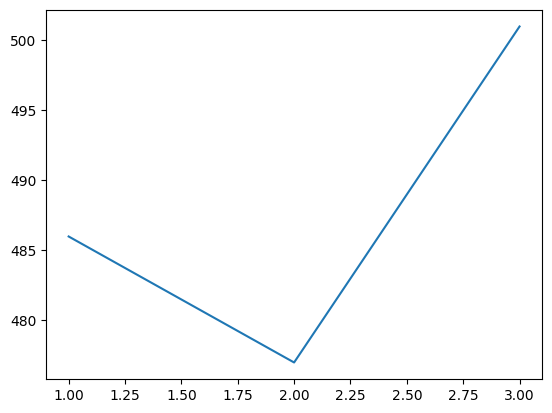

477.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 39, 43, 44, 46, 47, 48, 49, 50, 52, 54, 57, 58, 59, 60, 61, 62, 63, 66, 68, 69, 71, 73, 75, 77, 78, 81, 85, 86, 89, 90, 91, 99, 103, 106, 116, 120, 121, 123, 124, 129, 138, 144, 145, 146, 193, 194, 275, 340]


In [278]:
plt.plot([1, 2, 3], arr)
plt.show()
res = []
for i in range(m):
    if (best[i]==1):
        res.append(i+1)
print(cost_function(best))
print(res)

In [296]:
arr, best = algorithm(1, 5, 5, 3) #data = scp52

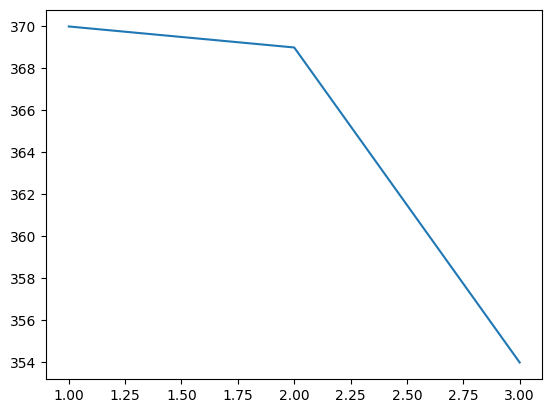

354.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 34, 35, 36, 38, 39, 41, 45, 46, 50, 52, 53, 55, 56, 59, 62, 71, 73, 74, 75, 80, 85, 91, 92, 93, 102, 104, 107, 109, 113, 116, 119, 121, 130, 138, 140, 143, 144, 148, 157, 159, 163, 181, 195, 216, 257, 261, 263, 269]


In [297]:
plt.plot([1, 2, 3], arr)
plt.show()
res = []
for i in range(m):
    if (best[i]==1):
        res.append(i+1)
print(cost_function(best))
print(res)

In [15]:
arr, best = algorithm(1, 5, 10, 5) #data = scp62

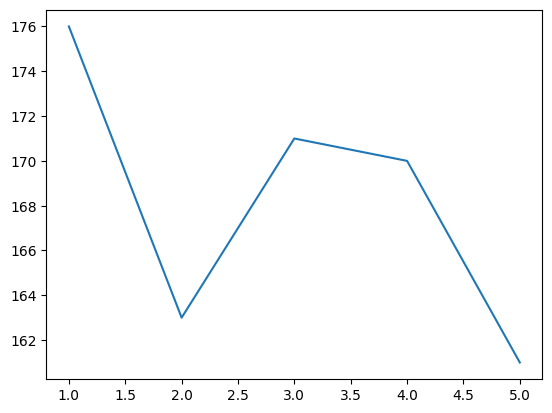

161.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 36, 44, 47, 52, 54, 60, 62, 64, 66, 71, 78, 83, 84, 87, 89]


In [16]:
plt.plot([1, 2, 3, 4, 5], arr)
plt.show()
res = []
for i in range(m):
    if (best[i]==1):
        res.append(i+1)
print(cost_function(best))
print(res)

The algorithm was good for all the test cases